US counties COVID 19 dataset

NYT's github CSV on COVID19 per US counties


In [1]:
# import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Read the data 

us_counties_covid = pd.read_csv('us-counties.csv', parse_dates=['date'])

us_counties_covid.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [3]:
# check for missing values

us_counties_covid.isnull().sum()

date          0
county        0
state         0
fips       8280
cases         0
deaths    18683
dtype: int64

In [4]:
us_counties_covid.shape

(881572, 6)

In [5]:
# checking missing fips values

us_counties_covid[us_counties_covid['fips'].isnull()]

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0.0
418,2020-03-01,Unknown,Rhode Island,NaN,2,0.0
448,2020-03-02,New York City,New York,NaN,1,0.0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0.0
482,2020-03-03,New York City,New York,NaN,2,0.0
...,...,...,...,...,...,...
880726,2020-12-30,Unknown,Puerto Rico,NaN,3870,1484.0
880738,2020-12-30,Unknown,Rhode Island,NaN,9622,60.0
880939,2020-12-30,Unknown,Tennessee,NaN,7679,50.0
881226,2020-12-30,Unknown,Utah,NaN,330,2.0


In [6]:
# checking for missing data on deaths

us_counties_covid[us_counties_covid['deaths'].isnull()]


,date,county,state,fips,cases,deaths
117486,2020-05-05,Adjuntas,Puerto Rico,72001.0,3,NaN
117487,2020-05-05,Aguada,Puerto Rico,72003.0,7,NaN
117488,2020-05-05,Aguadilla,Puerto Rico,72005.0,11,NaN
117489,2020-05-05,Aguas Buenas,Puerto Rico,72007.0,22,NaN
117490,2020-05-05,Aibonito,Puerto Rico,72009.0,13,NaN
...,...,...,...,...,...,...
880729,2020-12-30,Vega Baja,Puerto Rico,72145.0,2201,NaN
880730,2020-12-30,Vieques,Puerto Rico,72147.0,179,NaN
880731,2020-12-30,Villalba,Puerto Rico,72149.0,578,NaN
880732,2020-12-30,Yabucoa,Puerto Rico,72151.0,735,NaN


In [7]:
# check all counties with unknown values

us_counties_covid[us_counties_covid['state'] == 'Unknown']

,date,county,state,fips,cases,deaths


In [8]:
# we will plot data of states and cases and deaths in each state

len(us_counties_covid[us_counties_covid['deaths'].isnull()]['deaths'])

18683

In [9]:
us_counties_covid.shape

(881572, 6)

In [11]:
# since the missing death values are less than 2% of the total data and we cannot find any alternative to replace it
# we will drop the null values

cleaned_data_for_states = us_counties_covid[us_counties_covid['deaths'].notnull()]

In [12]:
cleaned_data_for_states

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
881567,2020-12-30,Sweetwater,Wyoming,56037.0,2943,15.0
881568,2020-12-30,Teton,Wyoming,56039.0,2121,3.0
881569,2020-12-30,Uinta,Wyoming,56041.0,1540,7.0
881570,2020-12-30,Washakie,Wyoming,56043.0,767,16.0


In [14]:
# let us group the data by states for plotting

state_data2 = pd.pivot_table(cleaned_data_for_states, index=['state'], aggfunc='sum', values=['cases', 'deaths'])



In [15]:
#creating a new column percentage deaths to view the data

state_data2['percentage_death'] = round((state_data2['deaths'] / state_data2['cases']) * 100, 2)
state_data2

,cases,deaths,percentage_death
state,,,
Alabama,31874774,521561.0,1.64
Alaska,2807387,12949.0,0.46
Arizona,46623249,1039942.0,2.23
Arkansas,18181230,282192.0,1.55
California,172658267,3039148.0,1.76
Colorado,23106455,537991.0,2.33
Connecticut,17028523,1113868.0,6.54
Delaware,5096921,144738.0,2.84
District of Columbia,3615638,145609.0,4.03


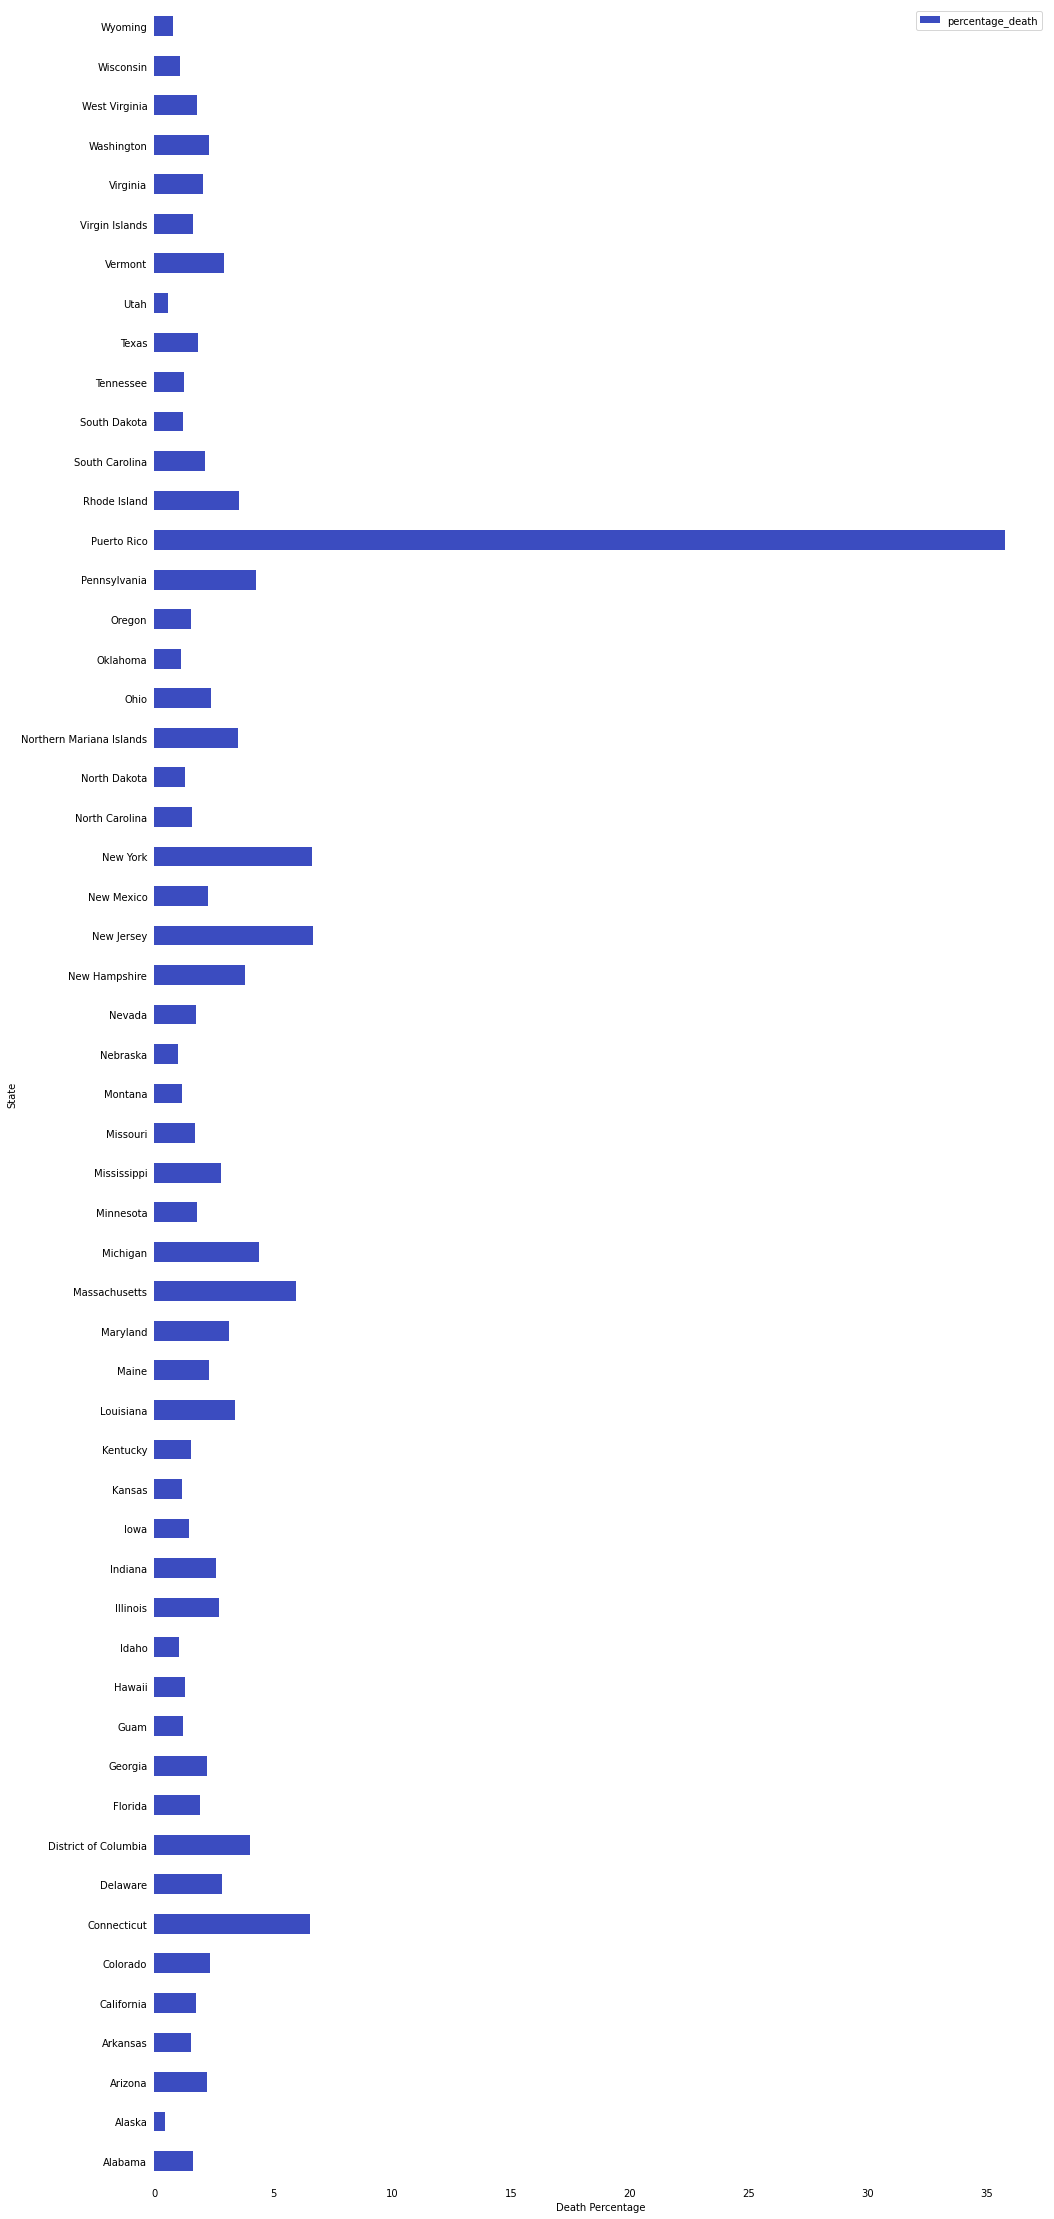

In [16]:
ax = state_data2.plot(y='percentage_death', kind='barh', stacked=False, figsize=[16,40], colormap='coolwarm')

ax.set_ylabel('State')
ax.set_xlabel('Death Percentage')
ax.tick_params(axis='x', which='both', bottom=False)
ax.tick_params(axis='y', which='both', left=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [17]:
# Puerto Rico has a very high death percentage

# why such a high percentage of death in 'puerto_ricou'?
# refer here - https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Puerto_Rico

# Most probable reasons are
# 1. proximity to sea
# 2. recent hurricane difficult to curb the spread



In [20]:
# Let us plot the puerto Rico yearly distribution of death rate 
puerto_rico_data = us_counties_covid[us_counties_covid['state'] == 'Puerto Rico']

puerto_rico_data


,date,county,state,fips,cases,deaths
1858,2020-03-13,Unknown,Puerto Rico,NaN,3,0.0
2220,2020-03-14,Unknown,Puerto Rico,NaN,4,0.0
2642,2020-03-15,Unknown,Puerto Rico,NaN,5,0.0
3107,2020-03-16,Unknown,Puerto Rico,NaN,5,0.0
3637,2020-03-17,Unknown,Puerto Rico,NaN,5,0.0
...,...,...,...,...,...,...
880729,2020-12-30,Vega Baja,Puerto Rico,72145.0,2201,NaN
880730,2020-12-30,Vieques,Puerto Rico,72147.0,179,NaN
880731,2020-12-30,Villalba,Puerto Rico,72149.0,578,NaN
880732,2020-12-30,Yabucoa,Puerto Rico,72151.0,735,NaN


In [30]:
# Grouping the data of puerto rico by month to get a clearer view of how much the deaths numbers increased gradually over the year 2020

puerto_rico_data['date'] = pd.to_datetime(puerto_rico_data['date'].copy())

puerto_rico_data.groupby(puerto_rico_data['date'].dt.strftime('%B'))['deaths'].sum().sort_values()


<ipython-input-30-035b9d2596fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puerto_rico_data['date'] = pd.to_datetime(puerto_rico_data['date'].copy())


date
March           35.0
April         1450.0
May           3633.0
June          4380.0
July          5485.0
August       10262.0
September    16703.0
October      23298.0
November     28581.0
December     39186.0
Name: deaths, dtype: float64

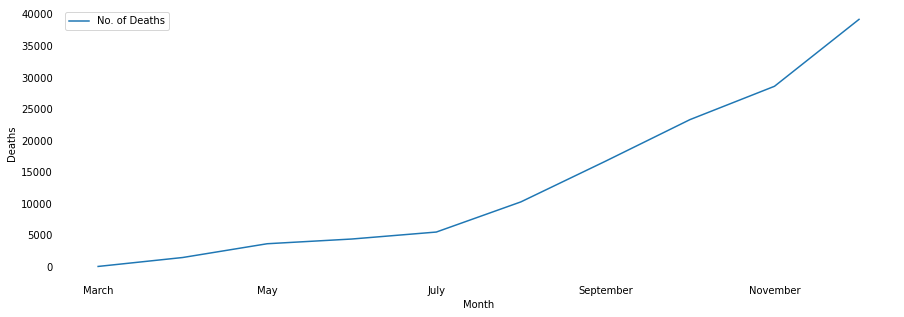

In [48]:
# Plotting the above data

ax = puerto_rico_data.groupby(puerto_rico_data['date'].dt.strftime('%B'))['deaths'].sum().sort_values().plot(x='date', y='deaths', figsize=(15,5))

ax.tick_params(axis='x', which='both', bottom=False)
ax.tick_params(axis='y', which='both', left=False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xlabel('Month')
ax.set_ylabel('Deaths')

plt.legend(['No. of Deaths']) 
plt.show()

In [49]:
# From the above data we can say clearly that from July onwards the number of deaths started rising tremendously